In [2]:
%reload_ext autoreload
%autoreload 2
import zeus.notebook_utils.syspath as syspath
syspath.add_parent_folder()

In [20]:
from multiprocessing import cpu_count

import torch
import numpy as np
from zeus.utils import home
from zeus.plotting.utils import axes

from kidney.datasets.segmentation import create_data_loaders
from kidney.experiments.patches import SegmentationExperiment
from kidney.utils.checkpoints import CheckpointsStorage
from kidney.utils.plotting import preview, preview_arrays

In [4]:
experiment, checkpoint = CheckpointsStorage.create(
    SegmentationExperiment, home("experiments/patches/checkpoints"), "avg_val_loss"
)

In [5]:
info = checkpoint.meta
info.keys()

dict_keys(['params', 'data', 'transformers'])

In [6]:
loaders = create_data_loaders(info["data"], info["transformers"], num_workers=cpu_count(), batch_size=16)

In [7]:
batch = next(iter(loaders['valid']))

In [8]:
with torch.no_grad():
    outputs = experiment(batch)['outputs']
    outputs = info["transformers"].post(outputs)

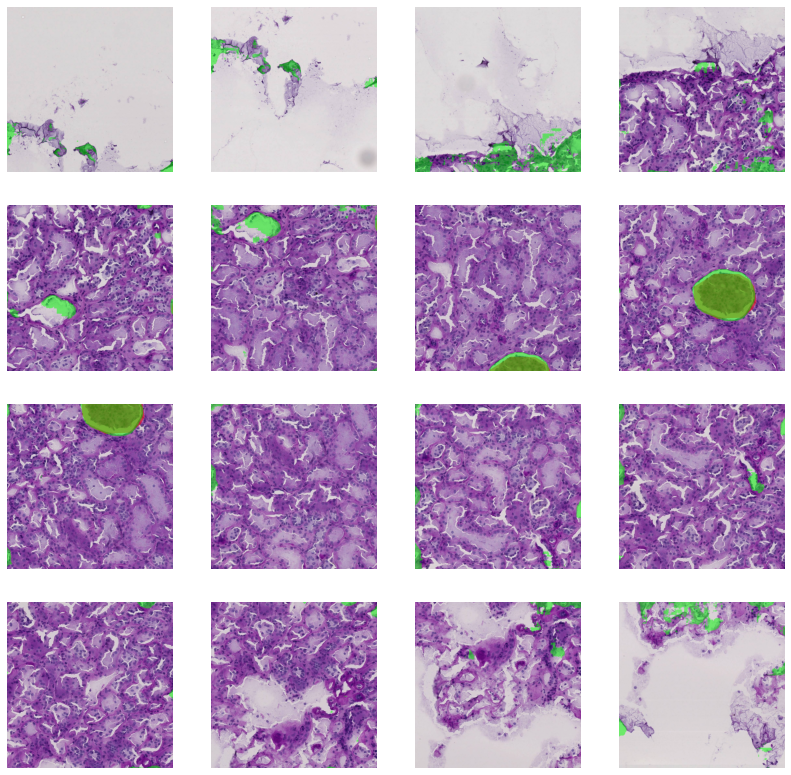

In [29]:
for image, gt, pred, ax in zip(
    batch['img'].numpy(),
    batch['seg'].squeeze().numpy(),
    outputs.squeeze().numpy(),
    axes(subplots=(4, 4), figsize=(14, 14)).flat
):
    preview_arrays(
        (image*255).astype(np.uint8),
        gt=gt,
        pred=pred,
        overlay_config=dict(resize=None),
        ax=ax
    )